In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [5]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [8]:
match.shape

(636, 18)

In [12]:
len(match['toss_winner'].unique())

14

In [8]:
match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

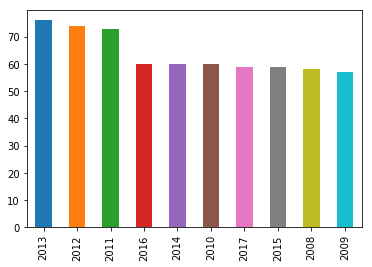

In [19]:
match['season'].value_counts().plot(kind='bar')

In [20]:
match['venue'].value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

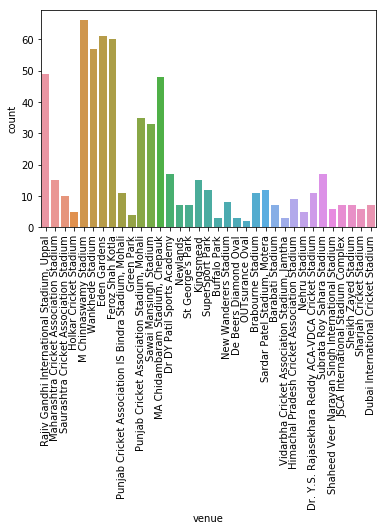

In [22]:
sns.countplot('venue',data=match)
plt.xticks(rotation='vertical')

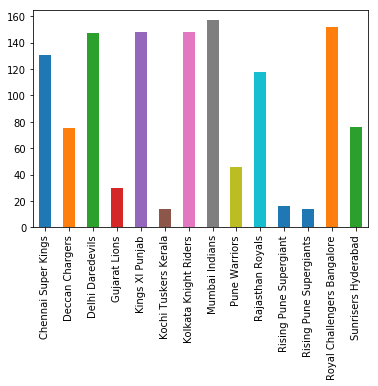

In [28]:
m1=match['team1'].value_counts()
m2=match['team2'].value_counts()
(m1+m2).plot(kind='bar')

In [30]:
match.drop_duplicates(subset=['season'],keep='last')[['season','winner']]

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


In [32]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [33]:
delivery.shape

(150460, 21)

In [34]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [36]:
len(delivery['bowler'].unique())

356

In [37]:
len(delivery['batsman'].unique())

461

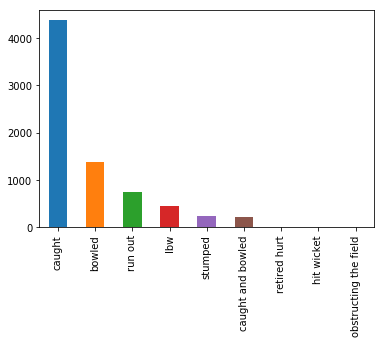

In [48]:
delivery['dismissal_kind'].value_counts().plot(kind='bar')

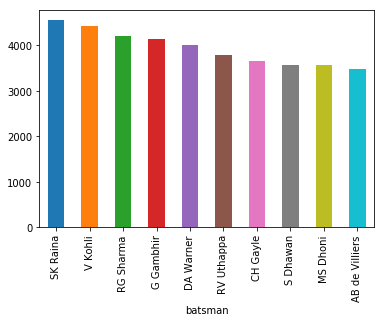

In [55]:
delivery.groupby('batsman')['batsman_runs'].agg('sum').sort_values(ascending=False).head(10).plot(kind='bar')

In [60]:
delivery.groupby('batsman').size().sort_values(ascending=False).head(10)

batsman
V Kohli       3494
G Gambhir     3433
SK Raina      3369
RG Sharma     3274
S Dhawan      3005
RV Uthappa    2960
DA Warner     2902
MS Dhoni      2680
AM Rahane     2602
CH Gayle      2532
dtype: int64

In [69]:
four_df=delivery[delivery['batsman_runs']==4]

In [70]:
four_df.groupby('batsman').size().sort_values(ascending=False)

batsman
G Gambhir           484
SK Raina            402
DA Warner           401
S Dhawan            401
V Kohli             384
RV Uthappa          377
RG Sharma           354
V Sehwag            334
AM Rahane           320
PA Patel            297
CH Gayle            297
SR Tendulkar        296
AB de Villiers      287
KD Karthik          286
BB McCullum         277
R Dravid            269
SE Marsh            269
SR Watson           258
JH Kallis           255
MS Dhoni            251
DR Smith            245
YK Pathan           240
AC Gilchrist        239
M Vijay             237
Yuvraj Singh        205
AT Rayudu           205
DPMD Jayawardene    200
MEK Hussey          198
MK Pandey           197
KC Sangakkara       195
                   ... 
I Malhotra            1
DM Bravo              1
DNT Zoysa             1
DR Martyn             1
RS Sodhi              1
SB Bangar             1
SA Abbott             1
GR Napier             1
GB Hogg               1
GD McGrath            1
SS Shaik

In [71]:
three_df=delivery[delivery['batsman_runs']==3]

In [72]:
three_df.groupby('batsman').size().sort_values(ascending=False)

batsman
M Vijay            17
S Dhawan           16
G Gambhir          15
AM Rahane          14
DA Warner          13
RV Uthappa         12
AB de Villiers     12
MS Dhoni           11
V Kohli            11
MEK Hussey         11
SK Raina           10
NV Ojha            10
M Vohra             9
BJ Hodge            8
JH Kallis           8
SR Watson           8
PA Patel            8
F du Plessis        8
MK Pandey           7
MK Tiwary           7
STR Binny           7
ST Jayasuriya       7
SR Tendulkar        7
RS Bopara           7
JP Duminy           6
SE Marsh            6
SV Samson           6
KD Karthik          6
YK Pathan           5
DJ Bravo            5
                   ..
UT Khawaja          1
W Jaffer            1
Y Venugopal Rao     1
P Dogra             1
Niraj Patel         1
NLTC Perera         1
M Klinger           1
K Goel              1
KB Arun Karthik     1
KJ Abbott           1
KM Jadhav           1
KS Williamson       1
KV Sharma           1
L Balaji            1
LA

In [74]:
six_df=delivery[delivery['batsman_runs']==6]

In [75]:
six_df.groupby('batsman').size().sort_values(ascending=False)

batsman
CH Gayle           266
SK Raina           174
RG Sharma          173
DA Warner          160
V Kohli            160
AB de Villiers     158
MS Dhoni           156
YK Pathan          149
KA Pollard         148
Yuvraj Singh       141
RV Uthappa         125
BB McCullum        124
SR Watson          122
DR Smith           117
V Sehwag           106
AC Gilchrist        92
M Vijay             89
GJ Maxwell          82
NV Ojha             79
AT Rayudu           79
SE Marsh            78
JP Duminy           78
DA Miller           78
KD Karthik          71
S Dhawan            71
MK Pandey           65
AM Rahane           60
DJ Hussey           60
AJ Finch            59
G Gambhir           58
                  ... 
JDS Neesham          1
RV Gomez             1
Rashid Khan          1
DE Bollinger         1
Iqbal Abdulla        1
SW Tait              1
S Rana               1
I Sharma             1
SA Abbott            1
GH Vihari            1
FY Fazal             1
CK Langeveldt        1
Sun

In [77]:
six_df.groupby('bowler').size().sort_values(ascending=False)

bowler
A Mishra           150
PP Chawla          135
Harbhajan Singh    114
RA Jadeja          109
P Kumar            104
DJ Bravo           100
PP Ojha             97
R Vinay Kumar       94
R Ashwin            90
IK Pathan           82
YS Chahal           81
UT Yadav            78
A Nehra             76
KV Sharma           75
RP Singh            70
L Balaji            69
R Bhatia            68
M Muralitharan      67
I Sharma            67
JP Faulkner         67
Z Khan              64
AR Patel            64
KA Pollard          63
SL Malinga          63
MM Sharma           63
SR Watson           62
M Morkel            61
SB Jakati           60
SP Narine           59
JH Kallis           58
                  ... 
RW Price             2
FH Edwards           2
GS Sandhu            2
DL Chahar            2
Tejas Baroka         2
B Laughlin           2
BMAJ Mendis          2
DB Ravi Teja         2
DAJ Bracewell        2
C Nanda              2
B Geeves             1
C Ganapathy          1
Abdu

In [78]:
dot_df=delivery[delivery['batsman_runs']==0]

In [79]:
dot_df.groupby('bowler').size().sort_values(ascending=False)

bowler
P Kumar             1260
SL Malinga          1256
Harbhajan Singh     1176
DW Steyn            1110
A Mishra            1038
Z Khan              1005
R Ashwin            1000
PP Chawla            966
B Kumar              961
IK Pathan            954
A Nehra              888
SR Watson            887
RP Singh             879
SP Narine            869
UT Yadav             852
R Vinay Kumar        841
I Sharma             824
M Morkel             804
DJ Bravo             802
JA Morkel            762
PP Ojha              753
AB Dinda             711
M Muralitharan       695
JH Kallis            693
DS Kulkarni          686
RA Jadeja            680
L Balaji             641
MM Patel             634
MM Sharma            626
Sandeep Sharma       601
                    ... 
Sachin Baby            5
SS Mundhe              5
C Munro                5
RR Bose                5
MB Parmar              5
LA Carseldine          5
S Rana                 5
DJ Harris              4
DB Ravi Teja      

In [85]:
mask1=delivery['dismissal_kind']=='caught'
mask2=delivery['dismissal_kind']=='bowled'
mask3=delivery['dismissal_kind']=='lbw'
mask4=delivery['dismissal_kind']=='stumped'
mask5=delivery['dismissal_kind']=='caught and bowled'
mask6=delivery['dismissal_kind']=='hit wicket'

new_delivery=delivery[mask1|mask2|mask3|mask4|mask5|mask6]

In [86]:
new_delivery.groupby('bowler').size().sort_values(ascending=False)

bowler
SL Malinga          154
A Mishra            134
Harbhajan Singh     127
PP Chawla           126
DJ Bravo            122
B Kumar             111
A Nehra             106
R Vinay Kumar       103
Z Khan              102
R Ashwin            100
SP Narine            95
DW Steyn             92
UT Yadav             91
RP Singh             90
P Kumar              90
PP Ojha              89
SR Watson            86
JA Morkel            85
MM Sharma            83
RA Jadeja            82
IK Pathan            80
M Morkel             77
L Balaji             76
DS Kulkarni          76
MM Patel             74
Sandeep Sharma       71
R Bhatia             71
YS Chahal            70
AB Dinda             69
SK Trivedi           65
                   ... 
SS Mundhe             1
SS Agarwal            1
GS Sandhu             1
JDS Neesham           1
PM Sarvesh Kumar      1
SB Joshi              1
LMP Simmons           1
S Vidyut              1
AC Gilchrist          1
RG More               1
GR Napier

In [94]:
death_over=delivery[delivery['over']>15]
mask1=delivery['over']>15
mask2=delivery['total_runs']==0
death_over=delivery[mask1&mask2]
death_over.groupby('bowler')['total_runs'].agg('count').sort_values(ascending=False)

bowler
SL Malinga           320
SP Narine            244
DJ Bravo             243
DW Steyn             211
B Kumar              188
SR Watson            177
UT Yadav             168
R Vinay Kumar        163
A Nehra              160
Z Khan               149
A Mishra             146
RP Singh             146
P Kumar              138
MM Sharma            120
RA Jadeja            117
IK Pathan            116
JP Faulkner          115
PP Chawla            113
M Morkel             112
L Balaji             110
R Ashwin             110
AB Dinda             107
M Muralitharan       103
JJ Bumrah             98
CH Morris             97
MJ McClenaghan        96
DS Kulkarni           94
MG Johnson            92
B Lee                 92
JH Kallis             89
                    ... 
LMP Simmons            2
MG Neser               2
MK Tiwary              2
R Sathish              2
S Rana                 2
C Nanda                2
S Badree               2
KAJ Roach              2
RS Gavaskar       

In [96]:
kuta=delivery['bowler']=='R Ashwin'
new_delivery=delivery[kuta]


In [99]:
new_delivery.groupby('batsman')['batsman_runs'].agg('sum').sort_values(ascending=False)

batsman
V Kohli                 127
GJ Maxwell               83
RV Uthappa               72
RG Sharma                70
SR Watson                59
LMP Simmons              58
AT Rayudu                53
MS Bisla                 52
S Dhawan                 51
CH Gayle                 49
DA Warner                48
AC Gilchrist             46
DA Miller                45
YK Pathan                43
G Gambhir                43
Yuvraj Singh             42
AB de Villiers           42
V Sehwag                 42
DR Smith                 40
SR Tendulkar             39
MA Agarwal               39
Gurkeerat Singh          39
KD Karthik               39
JH Kallis                36
JP Duminy                31
IK Pathan                29
KA Pollard               29
BB McCullum              29
DPMD Jayawardene         28
M Vijay                  28
                       ... 
X Thalaivan Sargunam      1
VVS Laxman                1
JC Buttler                1
TM Head                   1
MC Henriques

In [117]:
def bowler_vs_batsman(bowler,batsman):
    try:
        new_delivery=delivery[delivery['bowler']==bowler]
        runs=new_delivery.groupby('batsman')['batsman_runs'].agg('sum').sort_values(ascending=False)[batsman]
        no_balls=new_delivery.groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)[batsman]
        sr=(runs/no_balls)*100
        print('Balls bowled',no_balls)
        print('Runs Scored',runs)
        print('At a Strike Rate',sr)
    except:
           pass

In [113]:
bowler_vs_batsman('JP Duminy','V Kohli')

Balls bowled 11
Runs Scored 8
At a Strike Rate 72.72727272727273


In [122]:
new_delivery=delivery[delivery['batsman_runs']==6]
new_delivery=new_delivery[['batting_team','over','batsman_runs']]
new_delivery.shape

pivot=new_delivery.pivot_table(index='batting_team',columns='over',values='batsman_runs',aggfunc='count')

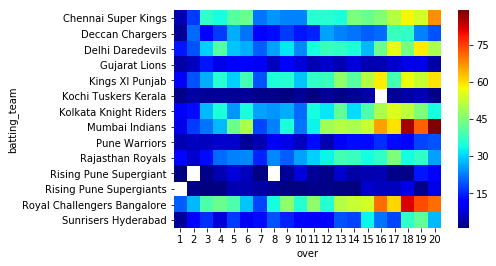

In [129]:
pivot
sns.heatmap(pivot,cmap='jet')
#sns.heatmap(pivot,cmap='viridis')
#sns.heatmap(pivot,cmap='summer')
#sns.heatmap(pivot,cmap='winter')
